### Investigate how Root-Mean-Squared-Log-error is different from Root-Mean-Square-Error

RMSLE is supposed to penalize an under-predicted estimate more than an over-predicted estimate.  This investigation will explore it to see if the RMSLE should be used as the error metric during training.

In [1]:
import numpy as np

### Make the data

In [2]:
np.random.seed(42)

start, stop = 0.5, 9.5
X = np.linspace(start, stop, num=20, endpoint=True, retstep=False, dtype=None).round(2)

a0 = 5
a1 = 1
a2 = 0
y = (a0 + a1*X + a2*X**2).round(2)

noise_mag = 8 # magnitude (+ or -) will be half this
noise = ((np.random.rand(len(y))-0.5)*noise_mag).round(2)
y += noise # add noise

### Plot it

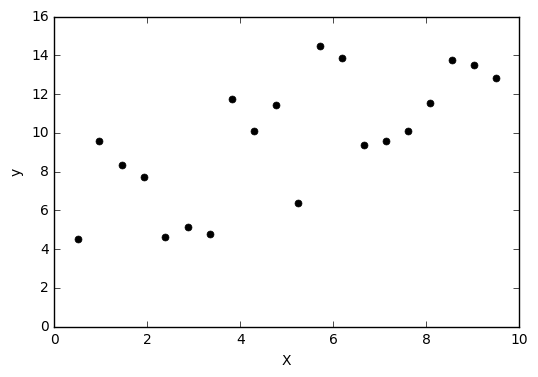

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, y, 'ko', markersize = 5)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_xlim([0,10])
ax.set_ylim([0,16]);

### Make the loss functions

In [4]:
def root_mean_sq_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def root_mean_sq_log_error(y_true, y_pred):
    return np.sqrt(np.mean((np.log(y_true + 1) - np.log(y_pred+1))**2))

### Fit the model

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [7]:
lr.fit(X, y)
b, m = round(lr.intercept_[0],2), round(lr.coef_[0][0],2)
print b, m

5.65 0.8


In [8]:
y_pred = m*X + b  # OLS fit

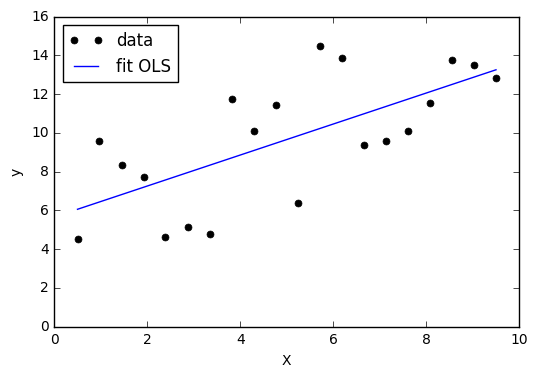

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, y, 'ko', markersize = 5, label = 'data')
ax.plot(X, y_pred, 'b-', markersize = 3, label = 'fit OLS')
#ax.set_aspect('equal')
ax.set_xlabel('X')
ax.set_ylabel('y');
ax.set_xlim([0,10])
ax.set_ylim([0,16])
ax.legend(loc = 'best');

### Calculate error functions

In [10]:
rmse_pred = root_mean_sq_error(y, y_pred).round(2)
rmsle_pred = root_mean_sq_log_error(y, y_pred).round(2)
print rmse_pred, rmsle_pred

2.34 0.25


### Now investigate effect of over and under-predicting on RMSLE and RMSE by changing the intercept, b, by an equal amount above and below the fit.

In [11]:
b_up = b + 2
y_up = m*X + b_up  
rmse_bup = root_mean_sq_error(y, y_up).round(2)
rmsle_bup = root_mean_sq_log_error(y, y_up).round(2)
print rmse_bup, rmsle_bup

3.07 0.33


In [12]:
b_down = b - 2
y_down = m*X + b_down  
rmse_bdown = root_mean_sq_error(y, y_down).round(2)
rmsle_bdown = root_mean_sq_log_error(y, y_down).round(2)
print rmse_bdown, rmsle_bdown

3.09 0.32


### Plot them

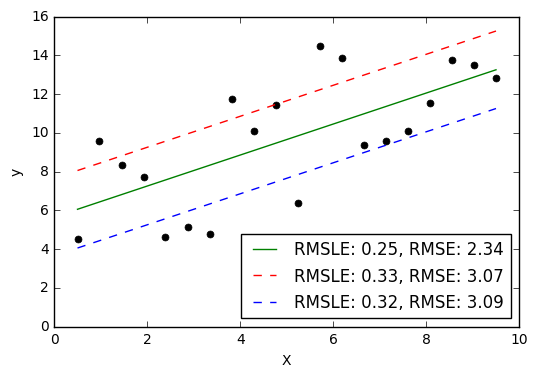

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, y, 'ko', markersize = 5)
ax.plot(X, y_pred,  'g-', label = 'RMSLE: '+str(rmsle_pred) +', RMSE: '+str(rmse_pred))
ax.plot(X, y_up,   'r--', label = 'RMSLE: '+str(rmsle_bup)  +', RMSE: '+str(rmse_bup))
ax.plot(X, y_down, 'b--', label = 'RMSLE: '+str(rmsle_bdown)+', RMSE: '+str(rmse_bdown))
#ax.set_aspect('equal')
ax.set_xlabel('X')
ax.set_ylabel('y');
ax.set_xlim([0,10])
ax.set_ylim([0,16]);
ax.legend(loc = 'best');

### Based on the investigation above I don't see a huge difference in the RMSLE for over or underpredicting, and it seems to follow the RMSE closely.  As a first pass I'm not going to worry about the RMSLE as an error function and will be fine with RMSE (or MSE).